In [103]:

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from datetime import datetime, date


# import all libraries

import re
from sklearn.linear_model import LogisticRegression

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV
import warnings # supress warnings
warnings.filterwarnings('ignore')



In [128]:

df = pd.read_csv('ODI-2022.csv', sep=";")
keep_df= pd.read_csv('ODI-2022.csv', sep=";")

df = df.rename(columns={'Tijdstempel':'Timestamp', 'What programme are you in?':'Programme',
       'Have you taken a course on machine learning?':'ML exp.',
       'Have you taken a course on information retrieval?':'IR exp.',
       'Have you taken a course on statistics?':'Stats exp.',
       'Have you taken a course on databases?':'DB exp.', 'What is your gender?':'Gender',
       'Chocolate makes you.....':'Chocolate', 'When is your birthday (date)?':'DOB',
       'Number of neighbors sitting around you?':'Neighbors', 'Did you stand up?':'Standup',
       'What is your stress level (0-100)?':'Stress',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ':'money',
       'Give a random number':'rn', 'Time you went to be Yesterday':'sleeptime',
       'What makes a good day for you (1)?':'good day 1',
       'What makes a good day for you (2)?':'good day 2'})
#Clean the programme column
df.head()

,Timestamp,Programme,ML exp.,IR exp.,Stats exp.,DB exp.,Gender,Chocolate,DOB,Neighbors,Standup,Stress,money,rn,sleeptime,good day 1,good day 2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [129]:
#Cleanup programme column 


df['Programme'].unique()  #get distinct value in the program column


df.loc[df['Programme'].str.contains('bio', case=False), 'Programme'] = 'Biomedical/informatics'

df.loc[df['Programme'].str.contains('artificial', case=False), 'Programme'] = 'Artificial Intelligence'
df.loc[df['Programme'].str.contains('AI', case=True), 'Programme'] = 'Artificial Intelligence'

df.loc[df['Programme'].str.contains('computational', case=False), 'Programme'] = 'Computational Science'
df.loc[df['Programme'].str.contains('CLS', case=True), 'Programme'] = 'Computational Science'

df.loc[df['Programme'].str.contains('computer', case=False), 'Programme'] = 'Computer Science'
df.loc[df['Programme'].str.contains('CS', case=True), 'Programme'] = 'Computer Science'

df.loc[df['Programme'].str.contains('econometrics|e&or|eor', case=False), 'Programme'] = 'Econometrics'


df.loc[df['Programme'].str.contains('finance|fin', case=False), 'Programme'] = 'Finance'

df.loc[df['Programme'].str.contains('qrm|quant', case=False), 'Programme'] = 'QRM'

df.loc[df['Programme'].str.contains('business', case=False), 'Programme'] = 'Business Analytics'
df.loc[df['Programme'].str.contains('BA', case=True), 'Programme'] = 'Business Analytics'


df.loc[df['Programme'].str.contains('ds|data science', case=False), 'Programme'] = 'Data Science'

df.loc[~df['Programme'].str.contains('artificial|comput|econometrics|finance|qrm|business|bio|data science|human', case=False), 'Programme'] = 'Other'


#Clean the ML column

df.loc[df['ML exp.'].str.contains('yes', case=False), 'ML exp.'] = 'Yes'
df.loc[~df['ML exp.'].str.contains('unknown|Yes', case=False), 'ML exp.'] ='No'
df.loc[df['ML exp.'].str.contains('unknown', case=False), 'ML exp.'] =None


#Clean the IR column
df['IR exp.'] = df['IR exp.'].apply(lambda x: "Yes" if str(x) == '1' else x)
df['IR exp.'] = df['IR exp.'].apply(lambda x: "No" if str(x) == '0' else x)
df.loc[df['IR exp.'].str.contains('unknown', case=False), 'IR exp.'] = None


#Clean the stats column

df.loc[df['Stats exp.'].str.contains('mu', case=False), 'Stats exp.'] = 'No'
df.loc[df['Stats exp.'].str.contains('sigma', case=False), 'Stats exp.'] = 'Yes'
df.loc[df['Stats exp.'].str.contains('unknown', case=False), 'Stats exp.'] = None


#Clean the database column

df.loc[df['DB exp.'].str.contains('nee', case=False), 'DB exp.'] = 'No'
df.loc[df['DB exp.'].str.contains('ja', case=False), 'DB exp.'] = 'Yes'
df.loc[df['DB exp.'].str.contains('unknown', case=False), 'DB exp.'] = None


#Clean the neighbours column

df.loc[ df['Neighbors'].str.contains('a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|q|r|s|t|u|v|w|x|y|z|>|<', case=False) , 'Neighbors'] = '0'

df['Neighbors'] = df['Neighbors'].apply(lambda x: int(x) if int(x)>=0 else 0)


#Clean the standup column

df.loc[df['Standup'].str.contains('yes', case=False), 'Standup'] = 'Yes'
df.loc[~df['Standup'].str.contains('unknown|yes', case=False), 'Standup'] ='No'
df.loc[df['Standup'].str.contains('unknown', case=False), 'Standup'] =None


#Clean the stress column

df.loc[ df['Stress'].str.contains('-|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|q|r|s|t|u|v|w|x|y|z', case=False) , 'Stress'] = '42.42'

df['Stress'] = df['Stress'].apply(lambda x: float(x) if float(x)>=0 else 0)

df['Stress'] = df['Stress'].apply(lambda x: float(x) if float(x)<=100 else 100)
df['Stress'] = df['Stress'].apply(lambda x: None if x==42.42 else x)

#Clean birthday


df.loc[df['DOB'].str.contains('a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|q|r|s|t|u|v|w|x|y|z', case=False), 'DOB'] = '01-01-2100'
df.loc[~df['DOB'].str.contains('/|-|.'), 'DOB'] = '01-01-2100'

df['DOB'] = df['DOB'].apply(lambda x: x if len(x)>9 else '01-01-2100')

df.loc[df['DOB'].str.contains('1057', case=False), 'DOB'] = '01-01-2100'
df.loc[df['DOB'].str.contains('01-01-2100', case=False), 'DOB'] = None


df['DOB'] = pd.to_datetime(df['DOB'])
df['DOB'] = df['DOB'].dt.date

#clean the You can get 100 euros if you win a local DM competition column

df['money'] = df['money'].apply(lambda x: "invalid" if str(x) == 'nan' else x)
df.loc[df['money'].str.contains(',|€|-|/|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|q|r|s|t|u|v|w|x|y|z', case=False), 'money'] = 'invalid'

df['money'] = df['money'].apply(lambda x: None if x =='invalid' else int(math.floor(float(x))))
#Good day cleaning

df["good day 1"] = df["good day 1"].str.lower()

#sleep = ["good sleep","good night of sleep","a lot of sleep","8 hours of sleep","sleep"]
#food = ["good food","food"]
weather = ["good weather","weather","sunny weather","sunny","sunshine","nice weather","sun","warm"]
physical = ["gym","physical","play","sport","excercise","biking","cycling","bike","cycle"]

#df.loc[df["What makes a good day for you (1)?"].isin(sleep), "What makes a good day for you (1)?"] = "sleep"



df.loc[df["good day 1"].str.contains("sleep"), "good day 1"] = "sleep"
df.loc[df["good day 1"].str.contains("friends"), "good day 1"] = "friends"


df.loc[df["good day 1"].str.contains("beer"), "good day 1"] = "alcohol"
df.loc[df["good day 1"].str.contains("alcohol"), "good day 1"] = "alcohol"

df.loc[df["good day 1"].str.contains("food"), "good day 1"] = "food"
df.loc[df["good day 1"].str.contains("coffee"), "good day 1"] = "coffee"

for w in weather:
    df.loc[df["good day 1"].str.contains(w), "good day 1"] = "weather"

for phy in physical:
    df.loc[df["good day 1"].str.contains(phy), "good day 1"] = "exercise"

goodDayCounter = df["good day 1"].value_counts()
# goodDayCounter

mostCommonGoodday = ['weather','food','sleep' ,'friends','coffee','exercise','alcohol','sex' ,'chocolate' ]
df['good day 1'] = df['good day 1'].apply(lambda x: x if x in mostCommonGoodday else 'Other')

  

  
# This function converts given date to age
def age(born):
    # born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df['Age'] = df['DOB'].apply(age)
df.head(5)


,Timestamp,Programme,ML exp.,IR exp.,Stats exp.,DB exp.,Gender,Chocolate,DOB,Neighbors,Standup,Stress,money,rn,sleeptime,good day 1,good day 2,Age
0,4-5-2022 12:12:07,Artificial Intelligence,Yes,No,No,No,female,neither,1998-02-05,0,No,0.0,5.0,888,23:00,coffee,sun,24.0
1,4-5-2022 12:12:07,Other,Yes,No,No,No,male,fat,2000-02-29,0,Yes,100.0,1.0,12,32,Other,8964,22.0
2,4-5-2022 12:12:09,Computational Science,Yes,Yes,No,Yes,male,fat,1998-06-29,1,No,0.0,100.0,9,x,Other,0,23.0
3,4-5-2022 12:12:09,Biomedical/informatics,Yes,No,None,No,male,neither,NaT,0,No,20.0,100.0,31,14:00,food,no stress,NaN
4,4-5-2022 12:12:15,Artificial Intelligence,Yes,Yes,No,Yes,male,fat,1997-03-10,0,No,2.0,100.0,86,07:20,weather,Good Food,25.0


In [10]:
goodDayCounter = df["good day 1"].value_counts()
goodDayCounter

Other        125
weather       71
food          34
sleep         21
friends       15
coffee        11
exercise      11
alcohol        8
sex            4
chocolate      4
Name: good day 1, dtype: int64

#### Analysis and relationship of variables

In [12]:
#Analysis on gender and stress
genderCount = df["Gender"].value_counts()
progCount = df['Programme'].value_counts()
print('Gender distribution:\n',genderCount)
print('Programme distribution:\n',progCount)


genderStress = df[["Gender", "Stress"]].groupby("Gender").mean()
print('Stress levels by gender:\n',genderStress)



Gender distribution:
 male                     183
female                   102
not willing to answer     12
gender fluid               6
intersex                   1
Name: Gender, dtype: int64
Programme distribution:
 Artificial Intelligence      111
Computational Science         38
Computer Science              37
Other                         31
Business Analytics            26
Biomedical/informatics        25
Econometrics                  18
QRM                            7
Finance                        4
Data Science                   4
Human Language Technology      3
Name: Programme, dtype: int64
Stress levels by gender:
                           Stress
Gender                          
female                 48.525253
gender fluid           75.750000
intersex               34.000000
male                   46.209551
not willing to answer  66.666667


In [13]:


#Programme and stress
progStressMean = df[['Programme', "Stress"]].groupby('Programme').mean()

progStressMedian = df[['Programme', "money"]].groupby('Programme').median()
print('Mean stress level by programme:\n',progStressMean)
print('Median stress level by programme:\n',progStressMedian)



Mean stress level by programme:
                               Stress
Programme                           
Artificial Intelligence    50.122642
Biomedical/informatics     39.000000
Business Analytics         41.192308
Computational Science      40.315789
Computer Science           56.702703
Data Science               43.000000
Econometrics               41.433333
Finance                    56.250000
Human Language Technology  34.166667
Other                      55.161290
QRM                        76.000000
Median stress level by programme:
                            money
Programme                       
Artificial Intelligence     20.0
Biomedical/informatics       6.0
Business Analytics           8.5
Computational Science       69.5
Computer Science            45.0
Data Science               100.0
Econometrics                 5.0
Finance                     99.0
Human Language Technology   50.0
Other                       50.0
QRM                         40.0


In [14]:
#Taking courses and stress levels

mlStress = df[['ML exp.', "Stress"]].groupby('ML exp.').mean()

expStress = df.groupby(['ML exp.','DB exp.','IR exp.', 'Stats exp.'])["Stress"].mean()

print('Machine learning experience/Stress levels \n', mlStress)
print('Machine learning,database, information ret., statisticsexperience/Stress levels \n', expStress)



Machine learning experience/Stress levels 
             Stress
ML exp.           
No       53.942593
Yes      44.775000
Machine learning,database, information ret., statisticsexperience/Stress levels 
 ML exp.  DB exp.  IR exp.  Stats exp.
No       No       No       No            60.333333
                           Yes           60.300000
                  Yes      No            49.666667
         Yes      No       No            47.142857
                           Yes           40.000000
                  Yes      No            47.300000
                           Yes           40.000000
Yes      No       No       No            49.052632
                           Yes           37.000000
                  Yes      No            60.750000
                           Yes           25.000000
         Yes      No       No            37.314286
                           Yes           39.833333
                  Yes      No            44.911111
                           Yes           35.83

In [15]:

#Course experience distribution

mlCount = df["ML exp."].value_counts()
irCount = df['IR exp.'].value_counts()
dbCount = df["DB exp."].value_counts()
statsCount = df['Stats exp.'].value_counts()
print('Have you taken a course on ML: \n',mlCount)
print('Have you taken a course on Info. retrieval: \n', irCount)
print('Have you taken a course on databases: \n',dbCount)
print('Have you taken a course on statistics: \n' ,statsCount)

Have you taken a course on ML: 
 Yes    185
No     112
Name: ML exp., dtype: int64
Have you taken a course on Info. retrieval: 
 No     202
Yes     75
Name: IR exp., dtype: int64
Have you taken a course on databases: 
 Yes    158
No     139
Name: DB exp., dtype: int64
Have you taken a course on statistics: 
 No     243
Yes     33
Name: Stats exp., dtype: int64


In [80]:
df.agg({'Stress' : ['max', 'min','mean','median'], 'money' : [ 'max','min','mean','median']})

,Stress,money
max,100.000000,1000000.000000
min,0.000000,0.000000
mean,48.184694,8652.907258
median,50.000000,25.000000


In [160]:
gooddayStress = df[['good day 1', "Stress",'money']].groupby('good day 1').mean()
print(gooddayStress.to_latex)


<bound method NDFrame.to_latex of                Stress         money
good day 1                         
Other       53.196581  20921.802083
alcohol     43.857143     46.142857
chocolate   54.375000      1.500000
coffee      48.100000    133.444444
exercise    60.090909  16029.750000
food        44.288235     96.642857
friends     45.800000     39.750000
sex         28.750000     30.000000
sleep       54.857143     60.368421
weather     39.661972     52.622951>


#### Some plots

In [162]:
# #Programme

# pie_data = df.groupby('Programme').size()

# # Seaborn color palette to plot pie chart
# palette_color = sns.color_palette('pastel')


# #palette_color = seaborn.color_palette('bright')
  
# plt.figure(figsize=(10, 10))

# # plotting data on chart
# plt.pie(pie_data.values, labels=pie_data.index, colors=palette_color, autopct='%.1f%%')
# plt.legend()
# # displaying chart
# plt.show()

Text(0, 0.5, 'Mean Stress')

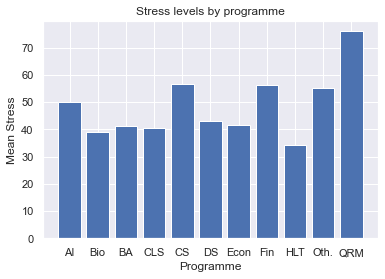

In [179]:
y = list(progStressMean.values.flatten())
x = ['AI','Bio' ,'BA'  ,'CLS' ,'CS' ,'DS' ,'Econ' ,'Fin','HLT','Oth.' ,'QRM']
plt.bar(x,y)
plt.title('Stress levels by programme')
plt.xlabel('Programme')
plt.ylabel('Mean Stress')

Regression


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [151]:

#Create subset of the dataframe 
sub = df[['Stress','ML exp.','IR exp.', 'DB exp.','Stats exp.','Age']]

#Convert to numerical values
sub = sub.dropna()
# sub['Stress'] = sub['Stress'].apply(lambda x: 0 if x <= 50 else 1)

sub['Age'] = sub['Age'].apply(lambda x: sub['Age'].mean() if x < 1 else x)
sub['ML exp.'] = sub['ML exp.'].apply(lambda x: 1 if x == 'Yes' else x)
sub['ML exp.'] = sub['ML exp.'].apply(lambda x: 0 if x == 'No' else x)
sub['DB exp.'] = sub['DB exp.'].apply(lambda x: 1 if x == 'Yes' else x)
sub['DB exp.'] = sub['DB exp.'].apply(lambda x: 0 if x == 'No' else x)
sub['Stats exp.'] = sub['Stats exp.'].apply(lambda x: 1 if x == 'Yes' else x)
sub['Stats exp.'] = sub['Stats exp.'].apply(lambda x: 0 if x == 'No' else x)
sub['IR exp.'] = sub['IR exp.'].apply(lambda x: 1 if x == 'Yes' else x)
sub['IR exp.'] = sub['IR exp.'].apply(lambda x: 0 if x == 'No' else x)
sub.corr()


,Stress,ML exp.,IR exp.,DB exp.,Stats exp.,Age
Stress,1.000000,-0.159339,-0.013799,-0.179571,-0.022284,0.178187
ML exp.,-0.159339,1.000000,0.322480,0.339733,-0.017962,0.019228
IR exp.,-0.013799,0.322480,1.000000,0.358731,-0.103656,-0.100345
DB exp.,-0.179571,0.339733,0.358731,1.000000,-0.061817,-0.090099
Stats exp.,-0.022284,-0.017962,-0.103656,-0.061817,1.000000,-0.055385
Age,0.178187,0.019228,-0.100345,-0.090099,-0.055385,1.000000


In [152]:
corr = sub.corr()

corr.style.background_gradient(cmap='coolwarm')

,Stress,ML exp.,IR exp.,DB exp.,Stats exp.,Age
Stress,1.000000,-0.159339,-0.013799,-0.179571,-0.022284,0.178187
ML exp.,-0.159339,1.000000,0.322480,0.339733,-0.017962,0.019228
IR exp.,-0.013799,0.322480,1.000000,0.358731,-0.103656,-0.100345
DB exp.,-0.179571,0.339733,0.358731,1.000000,-0.061817,-0.090099
Stats exp.,-0.022284,-0.017962,-0.103656,-0.061817,1.000000,-0.055385
Age,0.178187,0.019228,-0.100345,-0.090099,-0.055385,1.000000


In [119]:
sub.describe()


,Stress,ML exp.,IR exp.,DB exp.,Stats exp.,Age,money
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.474576,0.618644,0.271186,0.533898,0.101695,26.735852,17870.042373
std,0.501483,0.487791,0.446468,0.500977,0.303536,15.960816,129836.276842
min,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,2.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,24.000000,20.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,25.000000,99.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,126.000000,1000000.000000


In [145]:
X, y = sub[['IR exp.', 'DB exp.', 'Stats exp.','Stress',"Age"]], sub['ML exp.']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [147]:
sub.shape

(143, 6)

In [150]:


clf = LogisticRegression()

# model = LogisticRegression()
clf.fit(X_train, y_train)

scores = cross_val_score(clf , X_train, y_train, cv=5)

print("train %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))
predicted_y = clf.predict(X_test)
expected_y  = y_test

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))
# list(zip(expected_y,predicted_y))


d6 = {'actual':y_test,'predicted': predicted_y}
df6 = pd.DataFrame(data=d6)
df6["result_correct"] = abs(df6['predicted'] - df6['actual'])
print('correct result percentage is:' + str(1-df6['result_correct'].sum()/df6['result_correct'].count()))
df6['result_correct'] = df6['result_correct'].apply(lambda x: 'No' if x ==1 else 'Yes' )

df6

train 0.650 accuracy with a standard deviation of 0.089
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        20
           1       0.71      0.65      0.68        23

    accuracy                           0.67        43
   macro avg       0.68      0.68      0.67        43
weighted avg       0.68      0.67      0.67        43

[[14  6]
 [ 8 15]]
correct result percentage is:0.6744186046511628


,actual,predicted,result_correct
195,1,0,No
111,1,1,Yes
39,1,1,Yes
75,0,0,Yes
214,0,0,Yes
291,0,1,No
280,0,0,Yes
284,1,1,Yes
107,0,0,Yes
67,0,0,Yes


In [157]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

scores = cross_val_score(NB, X_train, y_train, cv=10)
#print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#predictions for the test data
predictions4 = NB.predict(X_test)

expected_y  = y_test

print(metrics.classification_report(expected_y, predictions4))
print(metrics.confusion_matrix(expected_y, predictions4))
d4 = {'Actual':y_test,'Predicted': predictions4}
df4 = pd.DataFrame(data=d4)
df4
scores

0.63 accuracy with a standard deviation of 0.13
              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.65      0.57      0.60        23

    accuracy                           0.60        43
   macro avg       0.61      0.61      0.60        43
weighted avg       0.61      0.60      0.60        43

[[13  7]
 [10 13]]


array([0.4, 0.5, 0.6, 0.7, 0.7, 0.7, 0.8, 0.5, 0.8, 0.6])

In [163]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                ML exp.   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     5.147
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           0.000323
Time:                        14:59:49   Log-Likelihood:                -57.999
No. Observations:                 100   AIC:                             128.0
Df Residuals:                      94   BIC:                             143.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4476      0.127      3.523      0.0